In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv("/content/drive/MyDrive/DL SK 21 3 23/Codes and Data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
X = df.drop(["Id","Species"], axis=1)
y = df["Species"]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [10]:
X_train.shape

(105, 4)

In [11]:
model = Sequential()
model.add(Dense(128, input_dim=4, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation="softmax"))

In [12]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["Accuracy"])

In [13]:
result = model.fit(X_train,y_train,batch_size=8,epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
14/14 [==============================] - 2s 24ms/step - loss: 0.9283 - Accuracy: 0.7429 - val_loss: 0.7391 - val_Accuracy: 0.7333
Epoch 2/10
14/14 [==============================] - 0s 6ms/step - loss: 0.5329 - Accuracy: 0.8571 - val_loss: 0.4920 - val_Accuracy: 0.7333
Epoch 3/10
14/14 [==============================] - 0s 6ms/step - loss: 0.3283 - Accuracy: 0.8762 - val_loss: 0.3678 - val_Accuracy: 0.7778
Epoch 4/10
14/14 [==============================] - 0s 5ms/step - loss: 0.2396 - Accuracy: 0.8952 - val_loss: 0.3281 - val_Accuracy: 0.8000
Epoch 5/10
14/14 [==============================] - 0s 7ms/step - loss: 0.1841 - Accuracy: 0.9238 - val_loss: 0.2873 - val_Accuracy: 0.8222
Epoch 6/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1702 - Accuracy: 0.9429 - val_loss: 0.2743 - val_Accuracy: 0.9333
Epoch 7/10
14/14 [==============================] - 0s 5ms/step - loss: 0.1268 - Accuracy: 0.9429 - val_loss: 0.2430 - val_Accuracy: 0.8889
Epoch 8/10
14/14 [=

[]

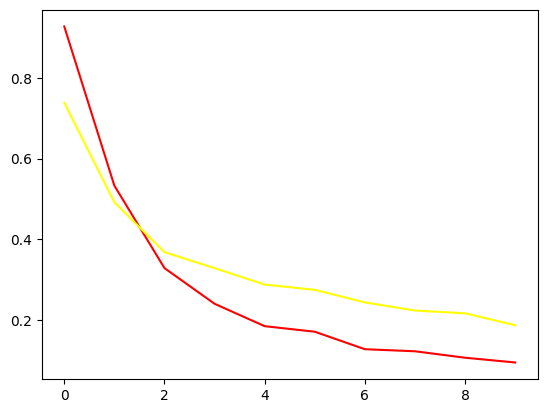

In [14]:
train_loss = result.history['loss']
train_accuracy = result.history['Accuracy']

test_loss = result.history['val_loss']
test_accuracy = result.history['val_Accuracy']

plt.figure()
plt.plot(train_loss, color="red")
plt.plot(test_loss, color="yellow")
plt.plot()

[]

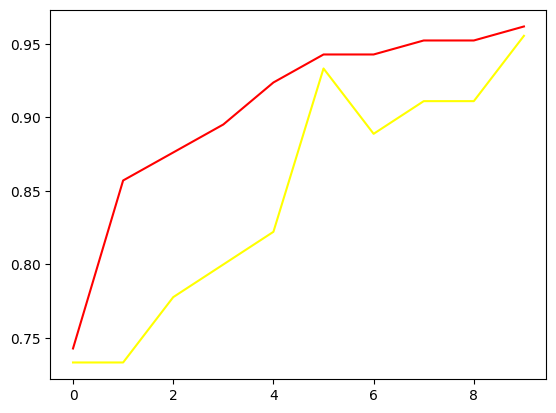

In [15]:
plt.figure()
plt.plot(train_accuracy, color="red")
plt.plot(test_accuracy, color="yellow")
plt.plot()

In [16]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 13ms/step


array([[9.99804974e-01, 1.95163258e-04, 7.68960506e-10],
       [1.59500446e-02, 9.83610153e-01, 4.39691299e-04],
       [1.18095437e-02, 9.66251552e-01, 2.19387840e-02],
       [9.99824762e-01, 1.75274996e-04, 1.14918042e-09],
       [3.83361185e-05, 1.21223010e-01, 8.78738582e-01],
       [1.20640807e-02, 7.49087214e-01, 2.38848627e-01],
       [3.34450524e-05, 8.36714264e-03, 9.91599381e-01],
       [9.99761343e-01, 2.38621782e-04, 3.80193876e-09],
       [9.99697208e-01, 3.02838831e-04, 8.38859204e-09],
       [9.08734273e-06, 3.03504500e-03, 9.96955931e-01],
       [4.61894879e-03, 9.82663631e-01, 1.27173336e-02],
       [9.99717116e-01, 2.82945490e-04, 3.09177861e-09],
       [1.28176025e-05, 4.59115393e-03, 9.95395958e-01],
       [1.80002656e-02, 8.66088450e-01, 1.15911245e-01],
       [1.11083044e-02, 6.73041165e-01, 3.15850526e-01],
       [9.99888480e-01, 1.11450761e-04, 1.05912989e-09],
       [3.06026312e-03, 9.93694007e-01, 3.24575766e-03],
       [1.38513548e-02, 7.44258

In [19]:
y_pred = np.argmax(y_pred, axis=1)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [33]:
def predict_species(X):
  X = scaler.transform([X])
  op = model.predict(X)
  op = np.argmax(op, axis=1)
  return encoder.inverse_transform(op)[0]

In [36]:
input_array = [5.6,3.9,1.6,1.5]

In [37]:
predict_species(input_array)

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


'Iris-setosa'